In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Data/SALARY_DATA_CLEANED.CSV")

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,max_sal,sal_prom,State,IN_HEADQUARTERS,COMPANY_AGE,PYTHON_YN,R_YN,SPARK_YN,AWS_YN,EXCEL_YN
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,91,72.0,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,112,87.5,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,90,85.0,FL,1,10,1,1,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,97,76.5,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,143,114.5,NY,1,22,1,0,0,0,1


In [4]:
df['Company Name']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: Company Name, Length: 742, dtype: object

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer'  in title.lower():
        return 'data engineer' 
    elif 'analyst'  in title.lower():
        return 'analyst' 
    elif 'machine learning'  in title.lower():
        return 'analyst'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
    
    

In [6]:
df['Job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.Job_simp.value_counts()

data scientist    279
analyst           124
data engineer     119
Name: Job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)

In [9]:
df['seniority'].value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [10]:
df[df.State != ' Los Angeles'].State.value_counts()

 CA    151
 MA    103
 NY     72
 VA     41
 IL     40
 MD     35
 PA     33
 TX     28
 NC     21
 WA     21
 NJ     17
 FL     16
 OH     14
 TN     13
 DC     11
 CO     11
 UT     10
 IN     10
 WI     10
 MO      9
 AZ      9
 AL      8
 KY      6
 GA      6
 DE      6
 MI      6
 CT      5
 IA      5
 LA      4
 OR      4
 NE      4
 KS      3
 NM      3
 ID      2
 MN      2
 SC      1
 RI      1
Name: State, dtype: int64

In [11]:
#Fix Los Angeles State

df.State.value_counts()
df['job_state'] = df.State.apply(lambda x: x if x != ' Los Angeles' else 'CA')
df.job_state.value_counts()

 CA    151
 MA    103
 NY     72
 VA     41
 IL     40
 MD     35
 PA     33
 TX     28
 NC     21
 WA     21
 NJ     17
 FL     16
 OH     14
 TN     13
 DC     11
 CO     11
 WI     10
 UT     10
 IN     10
 AZ      9
 MO      9
 AL      8
 GA      6
 KY      6
 DE      6
 MI      6
 IA      5
 CT      5
 LA      4
 OR      4
 NE      4
 KS      3
 NM      3
 ID      2
 MN      2
CA       1
 SC      1
 RI      1
Name: job_state, dtype: int64

In [12]:
# Job Description Lenght

#Agregar una columna que incluya la extension de la descripcion

df['Descr_len'] = df['Job Description'].apply(lambda x: len(x))
df['Descr_len'] 

0      2555
1      4828
2      3495
3      3926
4      2748
       ... 
737    6219
738    6167
739    3107
740    1678
741    3710
Name: Descr_len, Length: 742, dtype: int64

In [13]:
# Competitors
df['N_Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['N_Competitors'].value_counts()

0    460
3    228
2     41
1     12
4      1
Name: N_Competitors, dtype: int64

## Exploratory Analysis




In [14]:
df.describe()

,Rating,Founded,Hourly,Employer_provided,min_sal,max_sal,sal_prom,IN_HEADQUARTERS,COMPANY_AGE,PYTHON_YN,R_YN,SPARK_YN,AWS_YN,EXCEL_YN,Descr_len,N_Competitors
count,742.000000,742.000000,742.000000,742.0,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.0,74.068733,127.183288,100.626011,0.557951,46.659030,0.528302,0.129380,0.225067,0.237197,0.522911,3910.172507,1.053908
std,0.801210,497.183763,0.177034,0.0,31.869282,46.909006,38.855948,0.496965,53.719654,0.499535,0.335846,0.417908,0.425651,0.499812,1533.827777,1.384239
min,-1.000000,-1.000000,0.000000,0.0,10.000000,16.000000,13.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.0,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.0,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3781.500000,0.000000
75%,4.000000,2007.000000,0.000000,0.0,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4772.000000,3.000000
max,5.000000,2019.000000,1.000000,0.0,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000,4.000000


In [16]:
df.shape

(742, 32)

## Segregación de los datos en Numéricos y categóricos

In [28]:
features_numerical = df.select_dtypes(exclude = ['object']).copy()
features_categorical = df.select_dtypes(include = ['object']).copy()

### Visualización

### Distribución univariada de caractertisticas

c:\users\pc\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


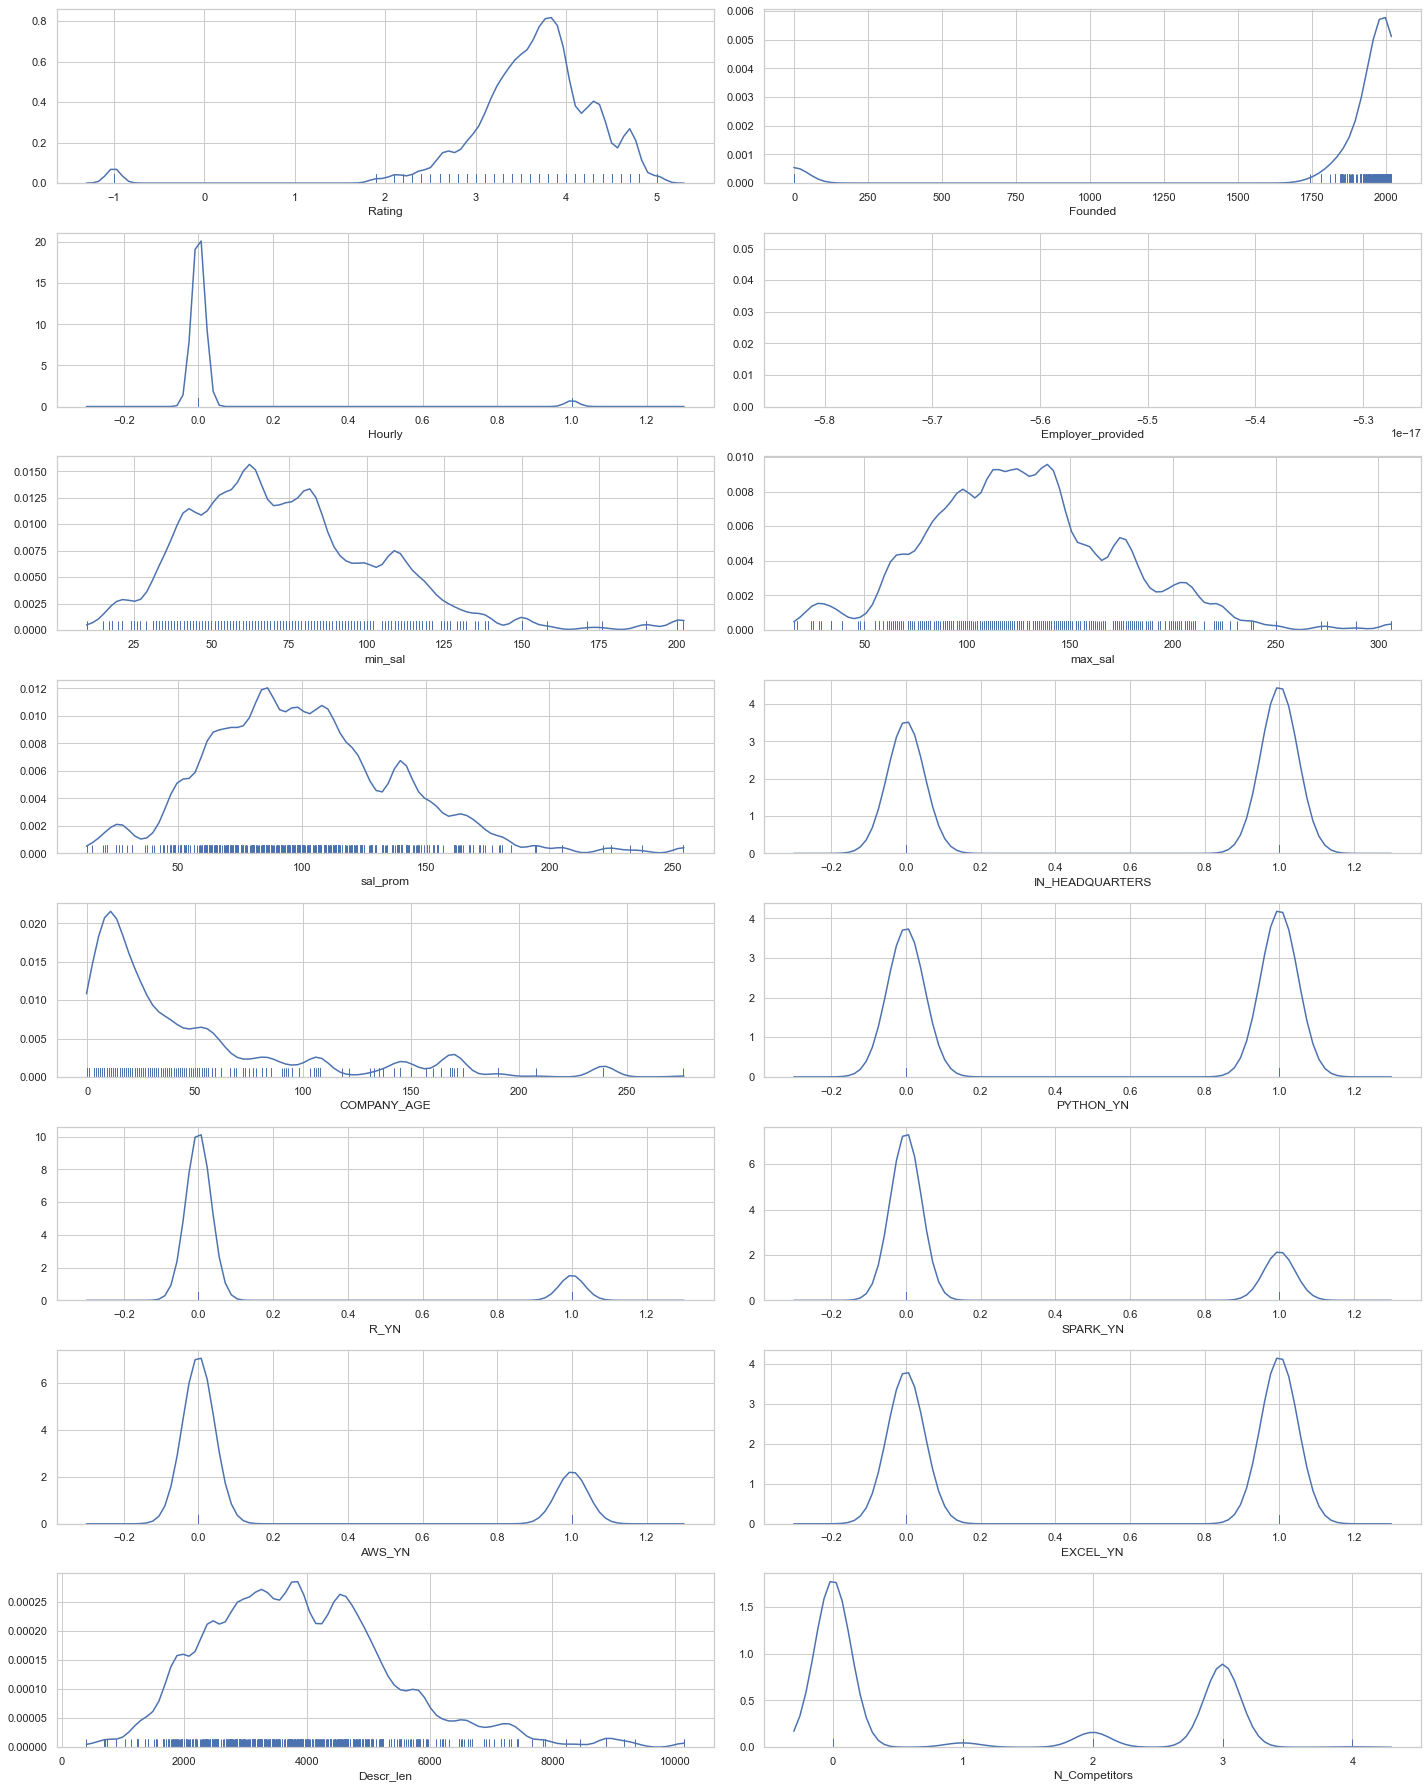

In [37]:
fig = plt.figure(figsize = (20,25))
sns.set(style = 'whitegrid')
for i in range (len(features_numerical.columns)):
    fig.add_subplot(8,2, i+1)
    sns.distplot(features_numerical.iloc[:, i].dropna(), 
                rug = True, hist = False , 
                kde_kws = {'bw': 0.1} , color = 'b')
    plt.xlabel(features_numerical.columns[i])
plt.tight_layout()
            

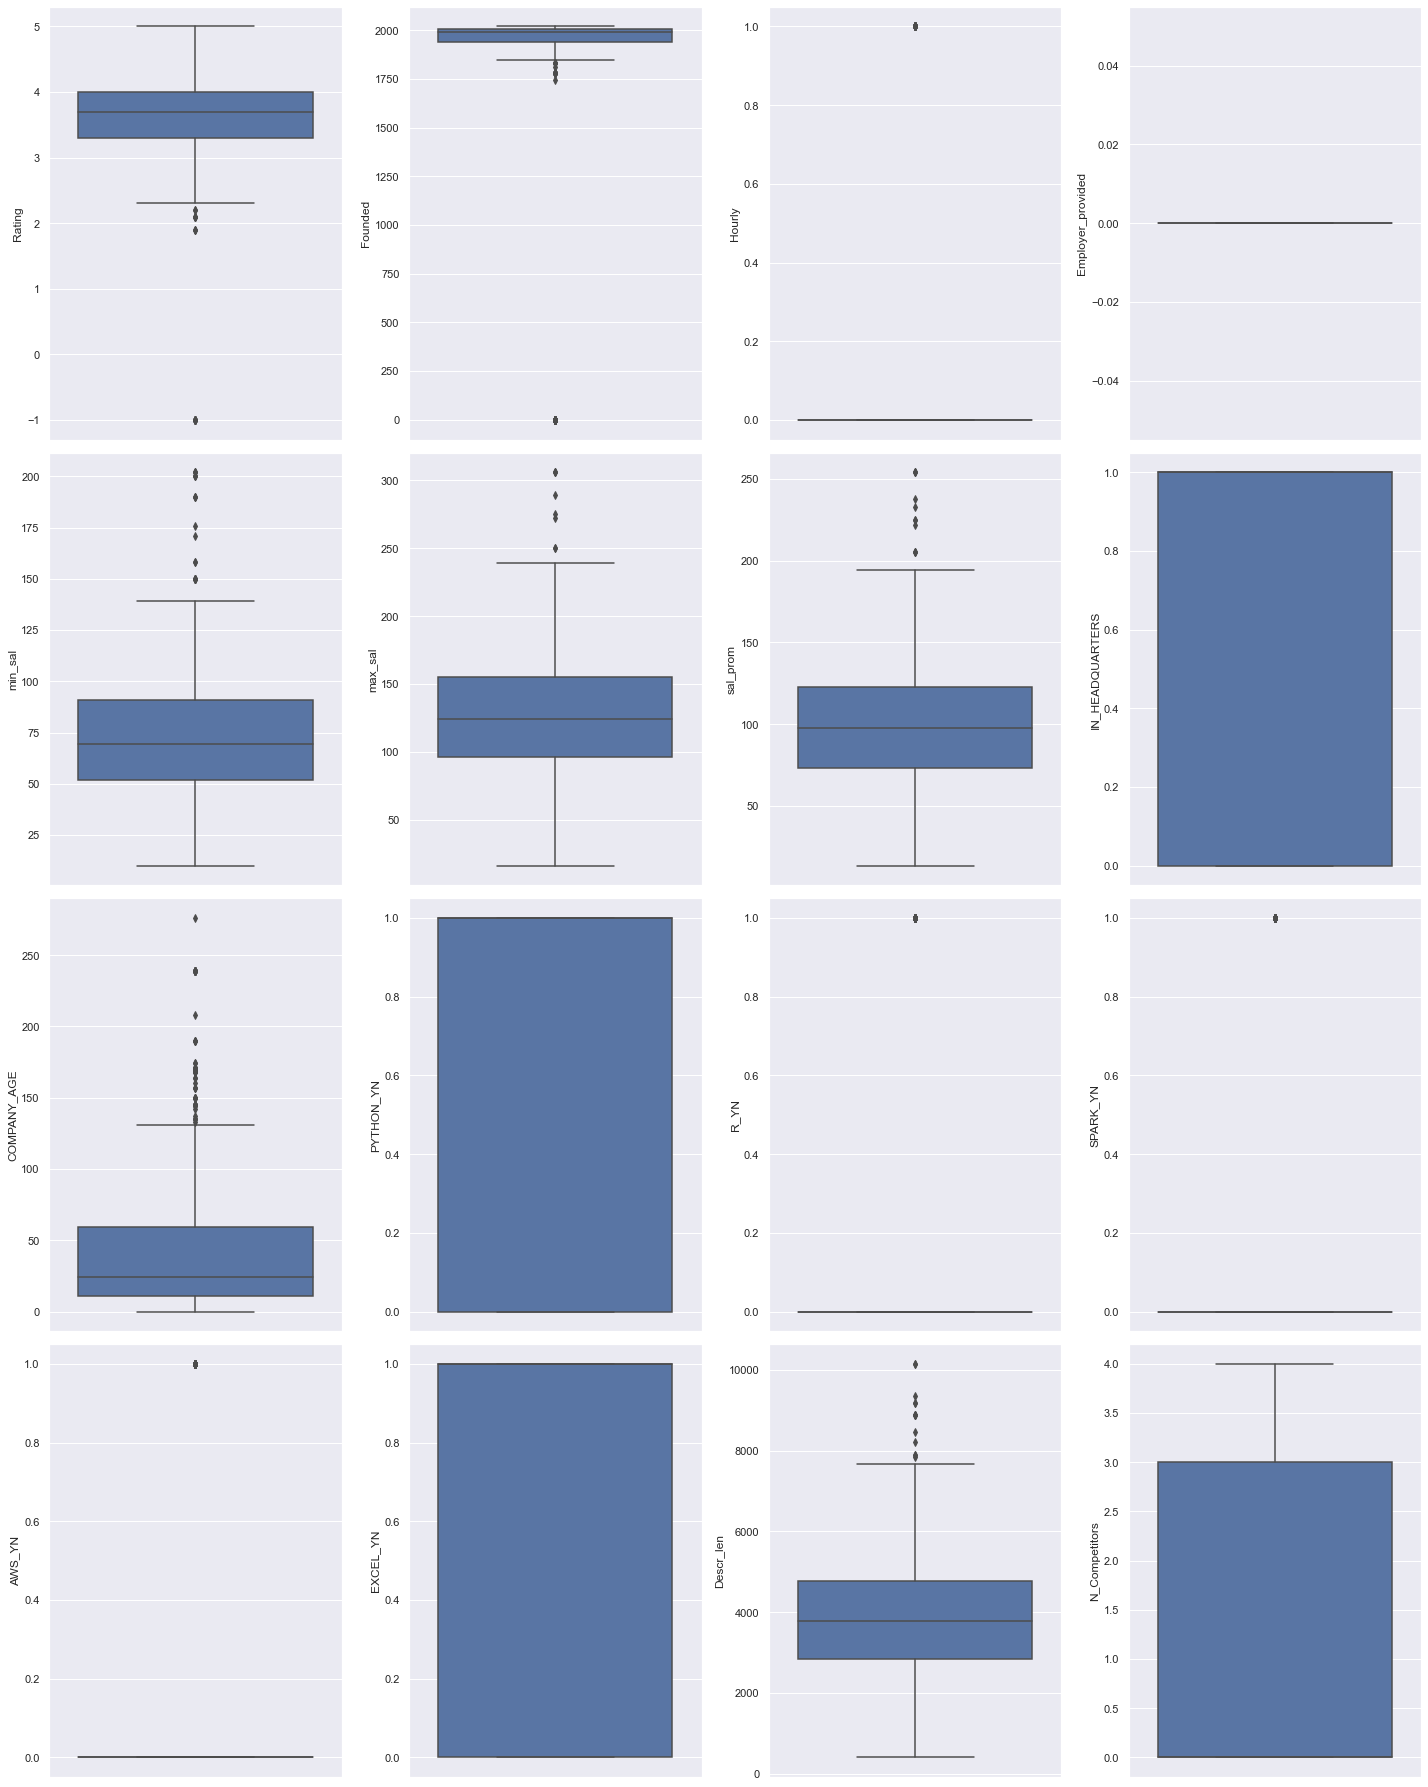

In [39]:

fig = plt.figure(figsize = (20,25))
sns.set(style = 'darkgrid')
for i in range(len(features_numerical.columns)):
    fig.add_subplot(4, 4, i+1)
    sns.boxplot(y = features_numerical.iloc[:,i].dropna())
plt.tight_layout()